In [1]:
"""
Template for week 4 project in Data Visualization

Solve the differential equations for Earth/Sun orbits using scipy
Plot the result orbits using matplotlib
"""

import math
import numpy as np

from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
# Define some constants - units are in kilograms, kilometers, and days
GRAV_CON = 4.981 * 10 ** (-10) 
MASS_SUN = 1.989 * 10 ** 30
MASS_EARTH = 5.977 * 10 ** 24
INIT_EARTH = (1.495979 * 10 ** 8, 0, 0, 2.56721625 * 10 ** 6)
ORBITS = {}

# Resource paths
DATA_PATH = "data/"
PLOTS_PATH = "plots/"


In [3]:
#########################################################################
# Part 1 -  Solve the orbital equations and plot the resulting orbits


def orbital_eqs(e_0, t_0):
    """
    Input: Tuple e_0 of floats that represent Earth's position (p_x, p_y)
    and velocity (v_x, v_y) at time t_0
    
    Output: Tuple that contains approximation to d(e)/dt,
    computed from the orbital equations
    
    NOTE: The variable t_0 is not used in computing the
    returned value for the orbital equations
    """
    
    pos_x, pos_y, v_x, v_y = e_0
    r_t = math.sqrt(pos_x**2 + pos_y**2)

    a_x = - GRAV_CON * MASS_SUN * pos_x / r_t**3
    a_y = - GRAV_CON * MASS_SUN * pos_y / r_t**3

    return (v_x, v_y, a_x, a_y) 
    

orbital_eqs([1.49597900e+08, 0.00000000e+00, 0.00000000e+00, 2.56721625e+06], 0.0)

(0.0, 2567216.25, -44269.06308723854, -0.0)

In [4]:
def solve_orbital_eqs(time_steps, speed=1.0):
    """
    Input: numpy array time_steps, optional float speed
    that scales the Earth's initial velocity
    
    Output: Returns a 2D numpy array whose rows are the
    x and y position of the Earth's orbit at specified times
    """
    
    scaled_init = (INIT_EARTH[0], INIT_EARTH[1], INIT_EARTH[2] * speed, INIT_EARTH[3] * speed)
    sol = odeint(orbital_eqs, scaled_init, time_steps)
    
    earth_orbit = np.array([sol[:, i] for i in range(2)])
    
    return earth_orbit

  
    

In [5]:
def test_solve_orbital_eqs():
    """ Test solve_orbital_eqs() """
    
    # Small test
    solve_orbital_eqs(np.linspace(0, 1, 3), 1.0)
    solve_orbital_eqs(np.linspace(0, 1, 11), 1.00)
    solve_orbital_eqs(np.linspace(0, 10, 101), 0.5)

    # Compute Earth/Sun orbits and save for later
    sim_steps = np.linspace(0, 1000, 1001)
    ORBITS["075"] = solve_orbital_eqs(sim_steps, 0.75)
    ORBITS["100"] = solve_orbital_eqs(sim_steps, 1.00)
    ORBITS["125"] = solve_orbital_eqs(sim_steps, 1.25)
    ORBITS["150"] = solve_orbital_eqs(sim_steps, 1.50)

test_solve_orbital_eqs()

In [6]:
def plot_earth_coords(orbit, time_steps, title="(p_x(t),p_y(t)) plots"):
    """
    Input: Numpy array orbit whose rows are numpy arrays containing x and y positions
    for the Earth orbit for specified times in the numpy array time_steps
    
    Action: Plot both x positions and y positions versus time_steps
    using matplotlib
    """
    
    _, axs = plt.subplots()
    
    axs.plot(time_steps, orbit[0], label='X Position(km)')
    axs.plot(time_steps, orbit[1], label='Y Position(km)')
    
    axs.set_xticks(np.linspace(np.min(time_steps), np.max(time_steps), 11))
    axs.set_yticks(np.linspace(min(np.min(orbit[0]), np.min(orbit[1])), 
                               max(np.max(orbit[0]), np.max(orbit[1])), 11))

    
    
    axs.set_xlabel('Time (days)')
    axs.set_ylabel('Earth Orbit Position (km)')
    axs.set_title(title)
    
    axs.legend()
    plt.show()



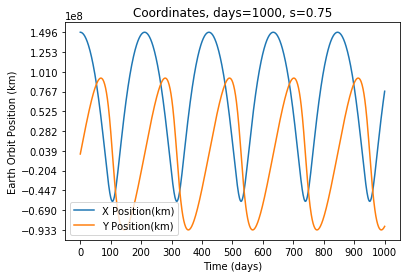

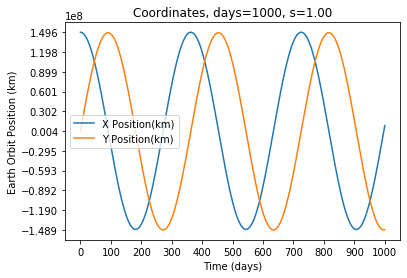

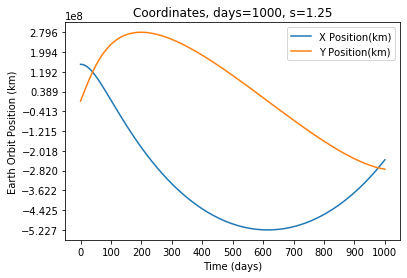

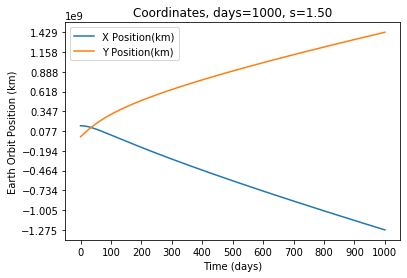

In [7]:
def test_plot_earth_coords():
    """ Test plot_earth_coords """
    
    sim_steps = np.linspace(0, 1000, 1001) 
    plot_earth_coords(ORBITS["075"], sim_steps, "Coordinates, days=1000, s=0.75")
    plot_earth_coords(ORBITS["100"], sim_steps, "Coordinates, days=1000, s=1.00")
    plot_earth_coords(ORBITS["125"], sim_steps, "Coordinates, days=1000, s=1.25")
    plot_earth_coords(ORBITS["150"], sim_steps, "Coordinates, days=1000, s=1.50")

test_plot_earth_coords()

In [8]:
def plot_earth_orbit(orbit, title="Plotted orbit"):
    """
    Input: Numpy array orbit whose rows are numpy arrays containing x and y positions
    for the Earth orbit
    
    Action: Plot x positions versus y positions using matplotlib
    """
    
    _, axs = plt.subplots()
    
    axs.plot(orbit[0], orbit[1], label='Earth Orbit')
    
    #axs.set_xticks(np.linspace(np.min(time_steps), np.max(time_steps), 11))
    #axs.set_yticks(np.linspace(min(np.min(orbit[0]), np.min(orbit[1])), 
    #                          max(np.max(orbit[0]), np.max(orbit[1])), 11))

     
    axs.set_xlabel('Earth Orbit X Positions (km)')
    axs.set_ylabel('Earth Orbit Y Positions (km)')
    
 
    axs.set_title(title)
    plt.xticks(rotation=45)
    
    axs.legend()
    plt.show()


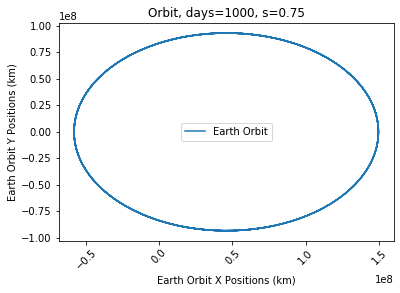

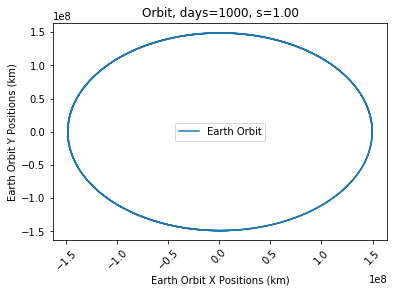

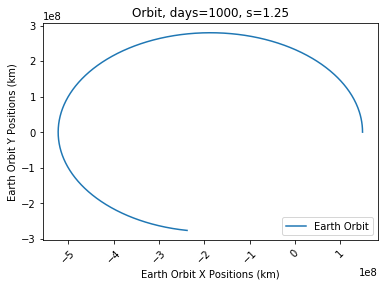

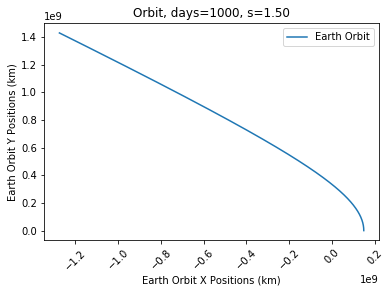

In [9]:
def test_plot_earth_orbit():
    """ Test plot_earth_orbit() """

    plot_earth_orbit(ORBITS["075"], "Orbit, days=1000, s=0.75")
    plot_earth_orbit(ORBITS["100"], "Orbit, days=1000, s=1.00")
    plot_earth_orbit(ORBITS["125"], "Orbit, days=1000, s=1.25")
    plot_earth_orbit(ORBITS["150"], "Orbit, days=1000, s=1.50")

test_plot_earth_orbit()

In [24]:
#########################################################################
# Part 2 - Animate the computed orbits


def extend_limits(limits, pad=0.1):
    """
    Input: Tuple limits = (min_x, max_x, min_y, max_y),
    float pad treated as a percentage

    Output: Tuple of four floats that represent new ranges
    extended by pad (as percentage of range length) in both directions
    """
    min_x, max_x, min_y, max_y = limits
    
    # Calculate the range for x and y
    range_x = max_x - min_x
    range_y = max_y - min_y
    
    # Calculate the padding for x and y
    pad_x = range_x * pad
    pad_y = range_y * pad
    
    # Extend the limits by the calculated padding
    new_min_x = min_x - pad_x
    new_max_x = max_x + pad_x
    new_min_y = min_y - pad_y
    new_max_y = max_y + pad_y
    
    return new_min_x, new_max_x, new_min_y, new_max_y

In [25]:
def animate_earth_orbit(orbit, title="Animated orbit"):
    """
    Input: Numpy array orbit whose rows are numpy arrays containing x and y positions
    for the Earth orbit, structured as orbit[0] for x-coordinates and orbit[1] for y-coordinates.
    
    Output: matplotlib Animation object corresponding to
    plot of x positions versus y positions using matplotlib
    """
    fig, axs = plt.subplots()
    axs.set_aspect('equal')
    
    # Get the min and max for both x and y in the data, and extend these limits
    min_x, max_x, min_y, max_y = extend_limits((min(orbit[0]), max(orbit[0]), 
                                                min(orbit[1]), max(orbit[1])))
    
    axs.set_xlim(min_x, max_x)
    axs.set_ylim(min_y, max_y)
    
    axs.set_xlabel('Earth Orbit X Positions (km)')
    axs.set_ylabel('Earth Orbit Y Positions (km)')
    axs.set_title(title)
    
    # Earth's Initialization
    earth, = axs.plot([], [], 'o', markeredgecolor="blue", 
                      markerfacecolor="blue", markersize=4)
    path, = axs.plot([], [], '-', color='steelblue', lw=1)
    text_e = axs.text(0, 0, '')  

    # Sun's Initialization (sun is at the origin)
    axs.plot(0, 0, marker="o", markersize=7, markeredgecolor="yellow", 
             markerfacecolor="yellow")
    axs.text(0, 0, 'Sun')  

    # Initialization function: plot the background of each frame
    def init():
        earth.set_data([], [])
        path.set_data([], [])
        text_e.set_text('')
        return earth, path, text_e
    
    # Animation function. This is called sequentially
    def update(frame):
        earth.set_data(orbit[0][frame], orbit[1][frame])
        path.set_data(orbit[0][:frame+1], orbit[1][:frame+1])
        text_e.set_text(f'Earth: Days {frame}') 
        text_e.set_position((orbit[0][frame], orbit[1][frame]))
        return earth, path, text_e
    

    anim = animation.FuncAnimation(fig, update, 
                                   frames=range(len(orbit[0])), 
                                   init_func=init, blit=True)

    return anim




Creating animation for speed=0.75


<IPython.core.display.Javascript object>


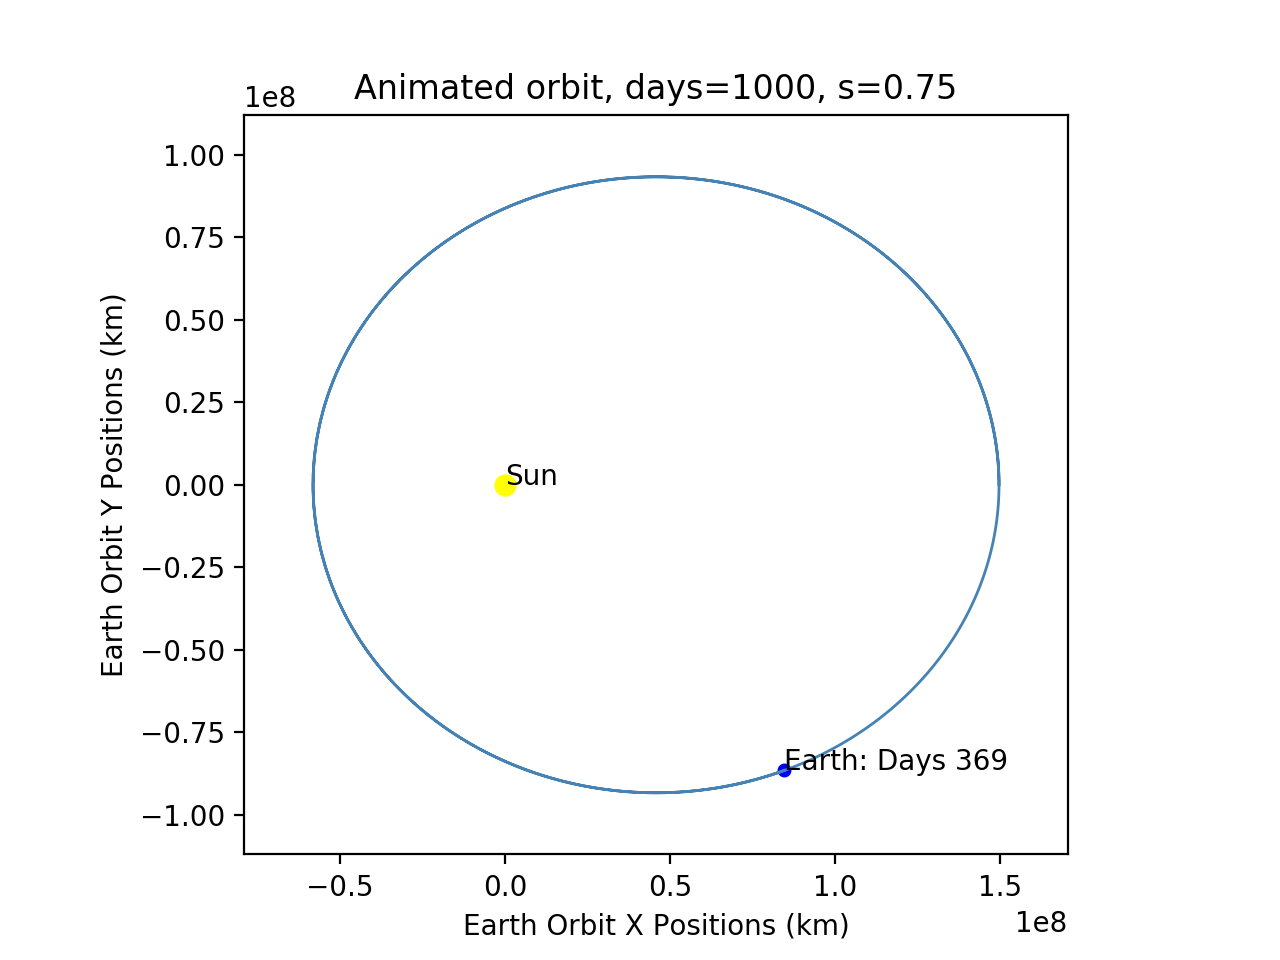

Creating animation for speed=1.00


<IPython.core.display.Javascript object>


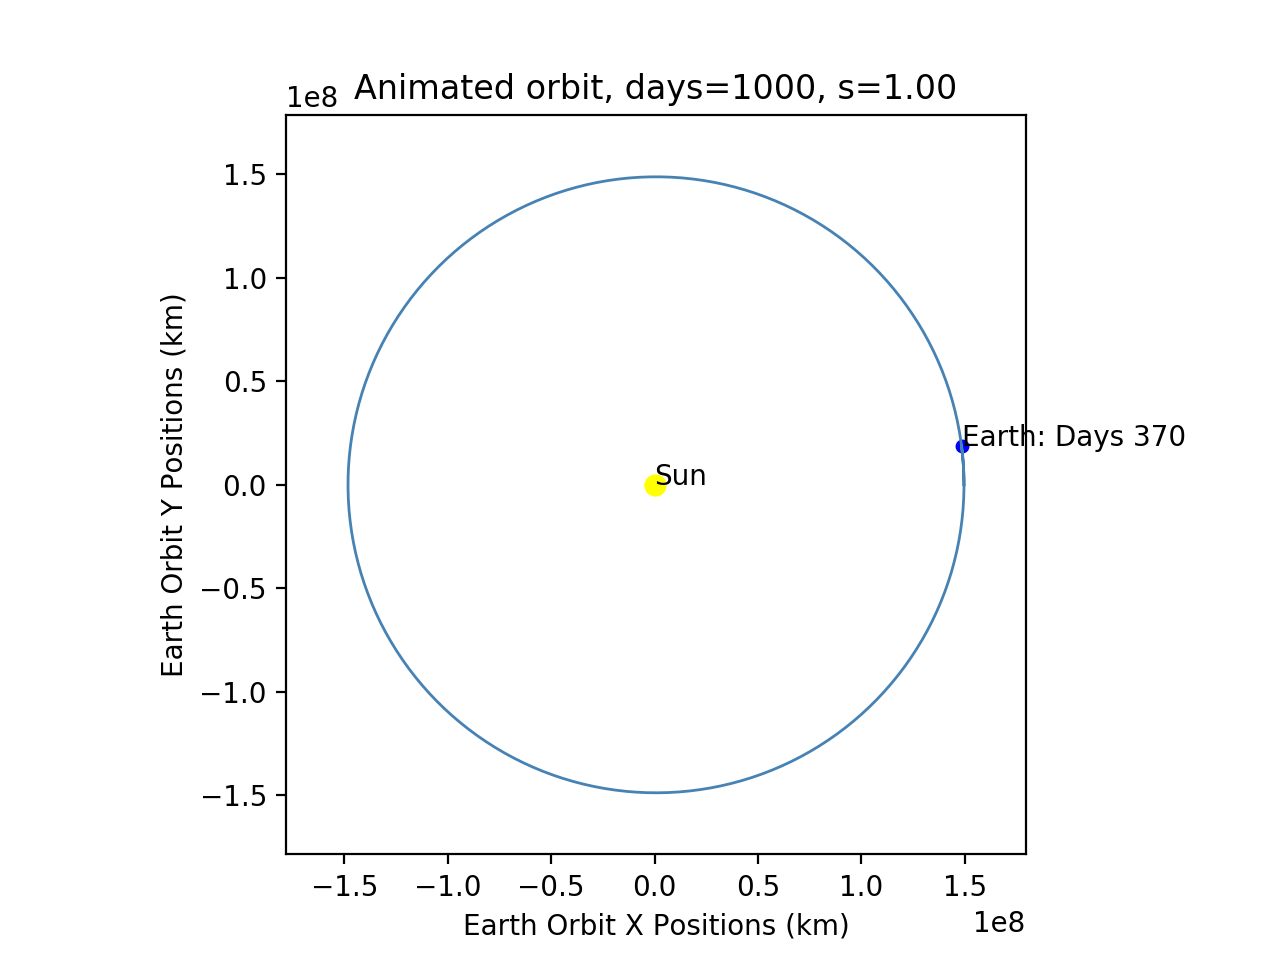

Creating animation for speed=1.25


<IPython.core.display.Javascript object>


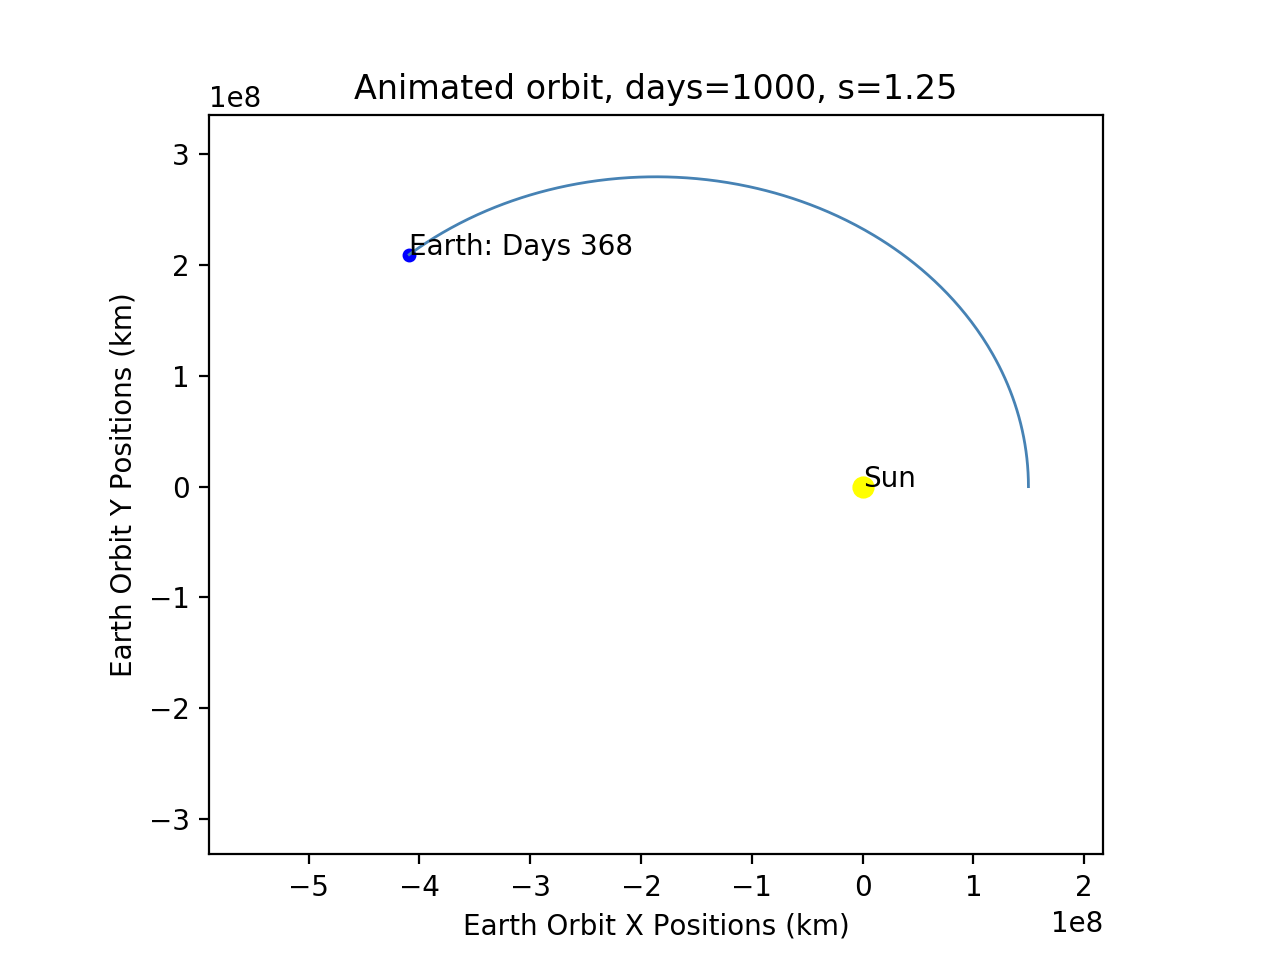

Creating animation for speed=1.50


<IPython.core.display.Javascript object>


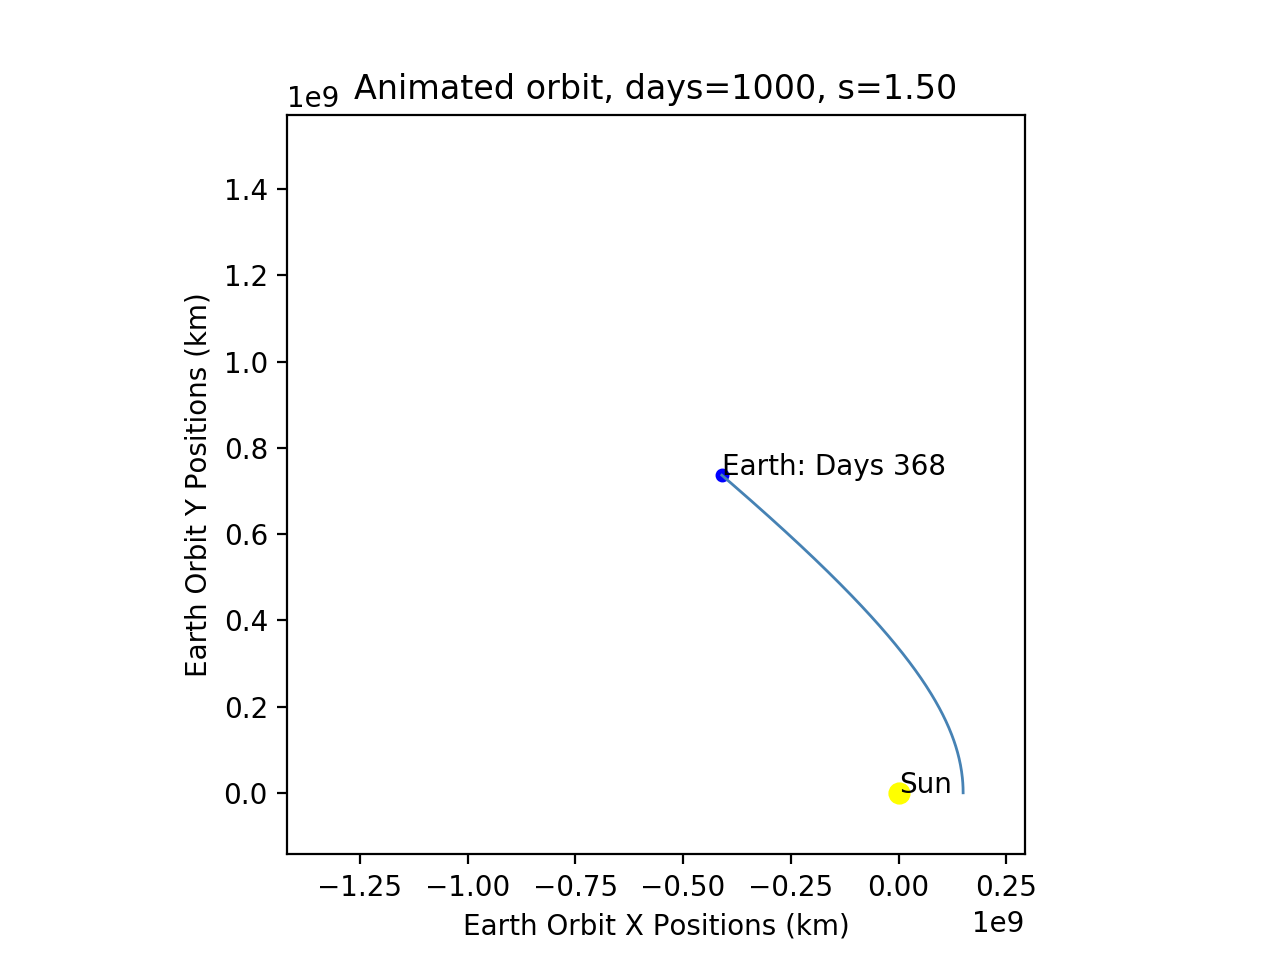

Done


In [26]:
def test_animate_earth_orbit():
    """ Test animate_earth_orbit() """
    
    print("Creating animation for speed=0.75")
    handle1 = animate_earth_orbit(ORBITS["075"], "Animated orbit, days=1000, s=0.75")
    
    print("Creating animation for speed=1.00")
    handle2 = animate_earth_orbit(ORBITS["100"], "Animated orbit, days=1000, s=1.00")
    
    print("Creating animation for speed=1.25")
    handle3 = animate_earth_orbit(ORBITS["125"], "Animated orbit, days=1000, s=1.25")
    
    print("Creating animation for speed=1.50")
    handle4 = animate_earth_orbit(ORBITS["150"], "Animated orbit, days=1000, s=1.50")
    print("Done")
        
    return handle1, handle2, handle3, handle4

%matplotlib notebook
# Save handles to animation objects so they are not garbage collected
HANDLES = test_animate_earth_orbit()

## Question 1##
**What are the geometric shapes of the various orbits computed by your simulations?**


<b>Ans:</b><br>
The geometric shapes of the various Earth's orbits computed by our simulation test_animate_earth_orbit() are ellipse, circle, un-closed ellipse, projectile.

## Question 2##
**What happened to the earth's trajectory when we increased its initial velocity by 50%?**


<b>Ans:</b><br>
Increasing the initial velocity would make the orbit more elliptical